In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(HTML cross)(2).csv")
data.head()

,labels,rfc_prediction_non,rfc_prediction_phish,rfc_prediction_spam,rfc_prediction_malware,rfc_prediction_defacemen,svc_prediction_non,svc_prediction_phish,svc_prediction_spam,svc_prediction_malware,svc_prediction_defacemen,lr_prediction_non,lr_prediction_phish,lr_prediction_spam,lr_prediction_malware,lr_prediction_defacemen
0,4,0.424848,0.019358,0.027752,0.004978,0.523064,0.628933,0.059069,0.199669,0.032785,0.079544,0.501857,0.062820,0.236335,0.043257,0.155732
1,4,0.067448,0.089885,0.072288,0.110062,0.660317,0.136320,0.123353,0.199990,0.340843,0.199494,0.226548,0.178265,0.218170,0.173935,0.203082
2,2,0.163979,0.301480,0.089261,0.176598,0.268682,0.118519,0.124519,0.194307,0.380231,0.182424,0.201474,0.199976,0.198627,0.199781,0.200142
3,2,0.066650,0.082535,0.801081,0.007228,0.042506,0.203928,0.114154,0.240610,0.250098,0.191210,0.296597,0.142971,0.166052,0.173963,0.220417
4,0,0.291278,0.312451,0.100305,0.112899,0.183068,0.118799,0.124598,0.194398,0.379418,0.182787,0.201935,0.199713,0.198497,0.199648,0.200206


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   rfc_prediction_non        6896 non-null   float64
 2   rfc_prediction_phish      6896 non-null   float64
 3   rfc_prediction_spam       6896 non-null   float64
 4   rfc_prediction_malware    6896 non-null   float64
 5   rfc_prediction_defacemen  6896 non-null   float64
 6   svc_prediction_non        6896 non-null   float64
 7   svc_prediction_phish      6896 non-null   float64
 8   svc_prediction_spam       6896 non-null   float64
 9   svc_prediction_malware    6896 non-null   float64
 10  svc_prediction_defacemen  6896 non-null   float64
 11  lr_prediction_non         6896 non-null   float64
 12  lr_prediction_phish       6896 non-null   float64
 13  lr_prediction_spam        6896 non-null   float64
 14  lr_predi

In [7]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [8]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [9]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.2378 - accuracy: 0.1942 - val_loss: 0.2063 - val_accuracy: 0.3087
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.4529 - val_loss: 0.1560 - val_accuracy: 0.5783
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.6413 - val_loss: 0.1317 - val_accuracy: 0.6812
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.7158 - val_loss: 0.1093 - val_accuracy: 0.7333
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.7936 - val_loss: 0.0908 - val_accuracy: 0.8087
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.8337 - val_loss: 0.0764 - val_accuracy: 0.8188
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.8474 - val_loss: 0.0664 - val_accuracy: 0.8362

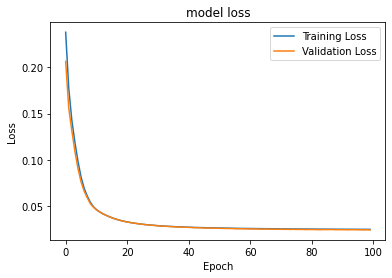

Validation Accuracy: 
Accuracy: 0.9159420289855073
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       225
           1       0.72      0.74      0.73        73
           2       0.97      0.93      0.95       131
           3       0.90      0.96      0.93       161
           4       0.90      0.91      0.91       100

    accuracy                           0.92       690
   macro avg       0.89      0.90      0.89       690
weighted avg       0.92      0.92      0.92       690

[[210   5   0  10   0]
 [  3  54   4   5   7]
 [  0   5 122   2   2]
 [  0   5   0 155   1]
 [  2   6   0   1  91]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1446 - accuracy: 0.5285 - val_loss: 0.0999 - val_accuracy: 0.7145
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.7378 - val_loss: 0.0749 - val_accuracy: 0.8029
Epoch 3/100
194/194 [==============================] - 0s 

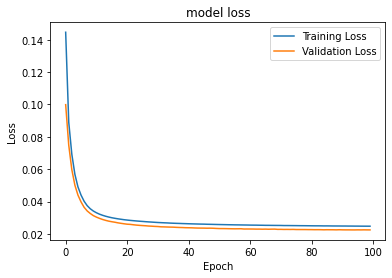

Validation Accuracy: 
Accuracy: 0.9246376811594202
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       257
           1       0.74      0.71      0.72        75
           2       0.98      0.96      0.97       128
           3       0.90      0.95      0.92       136
           4       0.91      0.91      0.91        94

    accuracy                           0.92       690
   macro avg       0.90      0.90      0.90       690
weighted avg       0.92      0.92      0.92       690

[[247   4   1   4   1]
 [  6  53   1   9   6]
 [  2   1 123   1   1]
 [  1   6   0 129   0]
 [  0   8   0   0  86]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.5219 - val_loss: 0.1093 - val_accuracy: 0.6797
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.7672 - val_loss: 0.0794 - val_accuracy: 0.8406
Epoch 3/100
194/194 [==============================] - 0s 

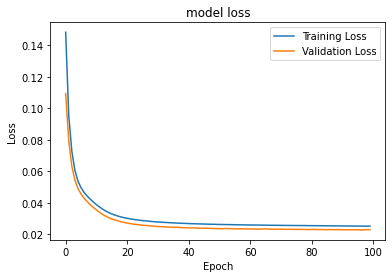

Validation Accuracy: 
Accuracy: 0.9246376811594202
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       241
           1       0.76      0.71      0.73        72
           2       0.95      0.95      0.95       131
           3       0.94      0.95      0.95       163
           4       0.87      0.93      0.90        83

    accuracy                           0.92       690
   macro avg       0.90      0.90      0.90       690
weighted avg       0.92      0.92      0.92       690

[[230   3   5   3   0]
 [  6  51   2   3  10]
 [  0   3 125   1   2]
 [  1   7   0 155   0]
 [  0   3   0   3  77]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1579 - accuracy: 0.4600 - val_loss: 0.1014 - val_accuracy: 0.7435
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.8232 - val_loss: 0.0695 - val_accuracy: 0.8551
Epoch 3/100
194/194 [==============================] - 0s 

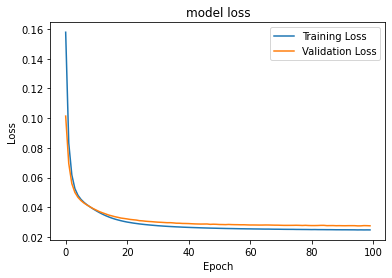

Validation Accuracy: 
Accuracy: 0.9101449275362319
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       221
           1       0.64      0.77      0.70        61
           2       0.97      0.96      0.97       141
           3       0.93      0.93      0.93       169
           4       0.87      0.82      0.84        98

    accuracy                           0.91       690
   macro avg       0.87      0.88      0.88       690
weighted avg       0.92      0.91      0.91       690

[[208   6   1   4   2]
 [  1  47   2   4   7]
 [  3   0 136   0   2]
 [  0  10   1 157   1]
 [  4  11   0   3  80]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1782 - accuracy: 0.2876 - val_loss: 0.1284 - val_accuracy: 0.6971
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.8002 - val_loss: 0.0849 - val_accuracy: 0.8319
Epoch 3/100
194/194 [==============================] - 0s 

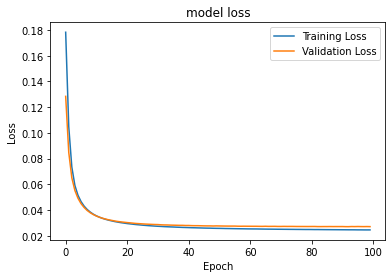

Validation Accuracy: 
Accuracy: 0.8942028985507247
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       218
           1       0.68      0.64      0.66        80
           2       0.96      0.93      0.94       142
           3       0.88      0.94      0.91       160
           4       0.85      0.88      0.86        90

    accuracy                           0.89       690
   macro avg       0.87      0.86      0.86       690
weighted avg       0.89      0.89      0.89       690

[[205   1   0   9   3]
 [  6  51   5   9   9]
 [  2   5 132   2   1]
 [  0   8   1 150   1]
 [  1  10   0   0  79]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1371 - accuracy: 0.6212 - val_loss: 0.0956 - val_accuracy: 0.8261
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.8360 - val_loss: 0.0710 - val_accuracy: 0.8464
Epoch 3/100
194/194 [==============================] - 0s 

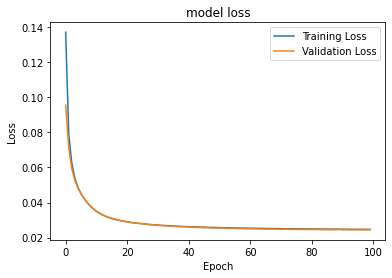

Validation Accuracy: 
Accuracy: 0.9188405797101449
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       205
           1       0.78      0.76      0.77        78
           2       0.96      0.97      0.97       133
           3       0.90      0.94      0.92       157
           4       0.91      0.89      0.90       117

    accuracy                           0.92       690
   macro avg       0.90      0.90      0.90       690
weighted avg       0.92      0.92      0.92       690

[[194   7   0   3   1]
 [  4  59   4   4   7]
 [  0   2 129   0   2]
 [  2   6   1 148   0]
 [  1   2   0  10 104]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1509 - accuracy: 0.6005 - val_loss: 0.1098 - val_accuracy: 0.7954
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.8234 - val_loss: 0.0813 - val_accuracy: 0.8374
Epoch 3/100
194/194 [==============================] - 0s 

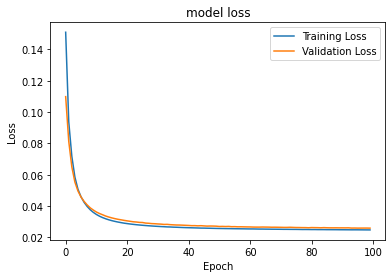

Validation Accuracy: 
Accuracy: 0.9100145137880987
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       233
           1       0.68      0.72      0.70        64
           2       0.91      0.93      0.92       122
           3       0.92      0.94      0.93       163
           4       0.92      0.91      0.91       107

    accuracy                           0.91       689
   macro avg       0.88      0.89      0.88       689
weighted avg       0.91      0.91      0.91       689

[[217   4   3   6   3]
 [  2  46   6   6   4]
 [  2   3 114   1   2]
 [  1   9   0 153   0]
 [  1   6   2   1  97]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1310 - accuracy: 0.6280 - val_loss: 0.0924 - val_accuracy: 0.7358
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0770 - accuracy: 0.8012 - val_loss: 0.0664 - val_accuracy: 0.8302
Epoch 3/100
194/194 [==============================] - 0s 

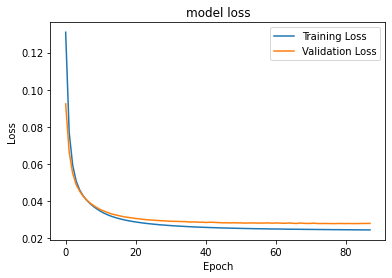

Validation Accuracy: 
Accuracy: 0.895500725689405
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       212
           1       0.75      0.64      0.69        74
           2       0.96      0.94      0.95       154
           3       0.87      0.92      0.90       157
           4       0.90      0.88      0.89        92

    accuracy                           0.90       689
   macro avg       0.88      0.86      0.87       689
weighted avg       0.89      0.90      0.89       689

[[199   3   1   8   1]
 [  8  47   3   9   7]
 [  5   3 145   1   0]
 [  5   4   2 145   1]
 [  2   6   0   3  81]]
Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.1448 - accuracy: 0.5668 - val_loss: 0.1067 - val_accuracy: 0.7721
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.8192 - val_loss: 0.0774 - val_accuracy: 0.8476
Epoch 3/100
194/194 [==============================] - 0s 2

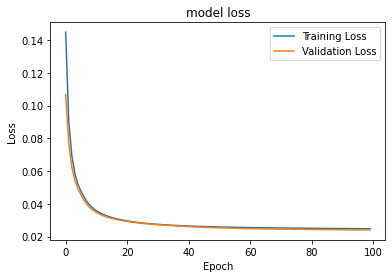

Validation Accuracy: 
Accuracy: 0.9288824383164006
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       221
           1       0.84      0.69      0.76        74
           2       0.96      0.93      0.95       133
           3       0.92      0.97      0.94       158
           4       0.90      0.93      0.91       103

    accuracy                           0.93       689
   macro avg       0.91      0.90      0.91       689
weighted avg       0.93      0.93      0.93       689

[[216   1   1   3   0]
 [  5  51   2   7   9]
 [  4   1 124   2   2]
 [  1   4   0 153   0]
 [  0   4   2   1  96]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1678 - accuracy: 0.4021 - val_loss: 0.1262 - val_accuracy: 0.5849
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.6409 - val_loss: 0.0944 - val_accuracy: 0.7271
Epoch 3/100
194/194 [==============================] - 0s 

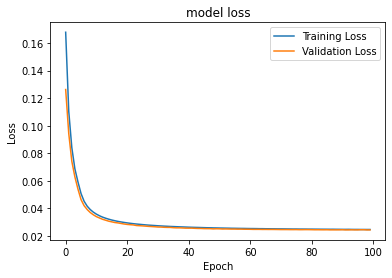

Validation Accuracy: 
Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       247
           1       0.71      0.67      0.69        55
           2       0.95      0.98      0.96       122
           3       0.90      0.93      0.91       148
           4       0.91      0.91      0.91       117

    accuracy                           0.92       689
   macro avg       0.89      0.89      0.89       689
weighted avg       0.92      0.92      0.92       689

[[236   4   2   4   1]
 [  3  37   1   8   6]
 [  1   0 119   1   1]
 [  1   7   1 137   2]
 [  2   4   2   2 107]]


In [10]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)